# K Mean Clustering without using standard library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

##  Generated a random sample of 600 points

In [2]:
#list.clear()

In [3]:
list=[]
n =600
for i in range(n):
    randomlist = random.sample(range(100, 5000), 2)
    list.append(randomlist)

In [4]:
len(list)

600

In [5]:
x_val=[]
y_val=[]
for i in range(len(list)):
    x=list[i][0]
    y=list[i][1]
    x_val.append(x)
    y_val.append(y)

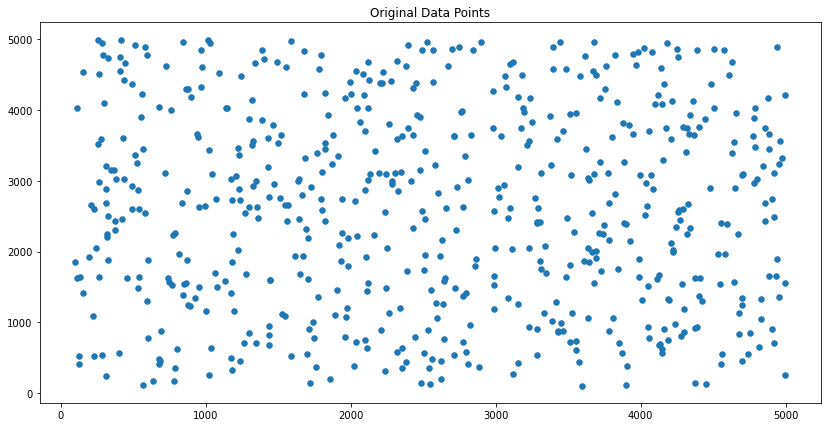

In [6]:
plt.scatter(x_val, y_val,s=30)
plt.title('Original Data Points')
plt.gcf().set_size_inches((14, 7))

### Here we are selecting a cluster of 3 and assigning arbitrary centroid from the sample generated above

In [7]:
centroid_1=random.choice(list)
centroid_2=random.choice(list)
centroid_3=random.choice(list)

## Locating these centroids on original data points

Text(0.5, 1.0, 'Original Data Points with arbitrary centroids')

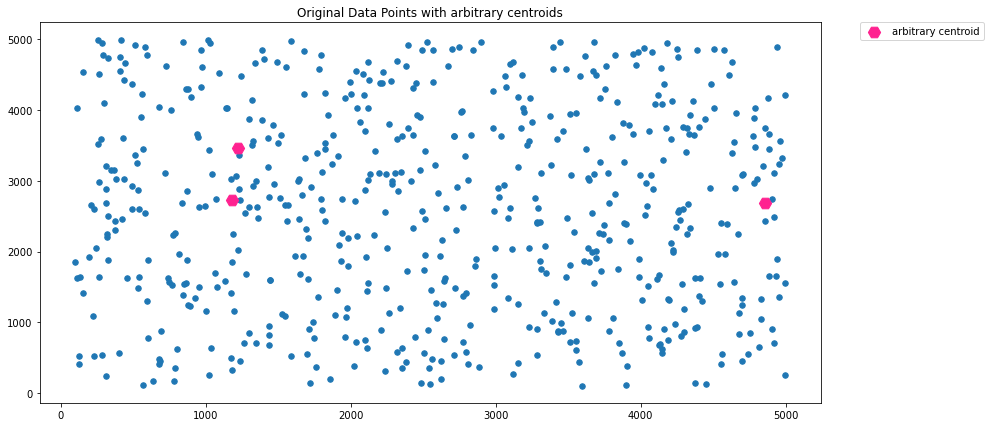

In [8]:
plt.scatter(x_val, y_val,s=30)
plt.scatter(centroid_1[0],centroid_1[1], marker='H',s=150,c='#FF2290',label='arbitrary centroid')
plt.scatter(centroid_2[0],centroid_2[1], marker='H',s=150,c='#FF2290')
plt.scatter(centroid_3[0],centroid_3[1], marker='H',s=150,c='#FF2290')
plt.gcf().set_size_inches((14, 7))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Original Data Points with arbitrary centroids')

In [9]:
centroid_1,centroid_2,centroid_3

([4857, 2679], [1181, 2725], [1222, 3460])

## Function for calculating Euclidean Distance

In [10]:
def dist(a, b):
    distance=[]
    x_dist=(a[0]-b[0])*(a[0]-b[0])
    y_dist=(a[1]-b[1])*(a[1]-b[1])
    dist=np.sqrt(x_dist+y_dist)
    return dist

## Function for calculating new centroid
##### Here new centroid is calculated based assignment of new data point to initial cluster based on Euclidean distance and calculating the new centroid based on the average value after allocation of new data in the cluster

In [11]:
# Calculation of centroid for each cluster
# here we are running loop for each cluster, which are passed as m,n,o and each time centroid is calculated based on
# average value of x and y components for each cluster

def centroid(m,n,o):
    
    centroid_a=[]
    centroid_b=[] 
    centroid_c=[]
    x_list=[]
    y_list=[]
    for i in range(len(m)):
        if len(m)<2:
            x=m[0][0]
            y=m[0][1]
        else:
            x=m[i][0]
            y=m[i][1]
        x_list.append(x)
        y_list.append(y)
    x_avg=np.mean(x_list)
    y_avg=np.mean(y_list)
    centroid_a.extend([x_avg,y_avg])
    x_list.clear()
    y_list.clear()
    for i in range(len(n)):
        if len(n)<2:
            x=n[0][0]
            y=n[0][1]
        else:
            x=n[i][0]
            y=n[i][1]
        x_list.append(x)
        y_list.append(y)
    x_avg=np.mean(x_list)
    y_avg=np.mean(y_list)
    centroid_b.extend([x_avg,y_avg])
    x_list.clear()
    y_list.clear()
    for i in range(len(o)):
        if len(o)<2:
            x=o[0][0]
            y=o[0][1]
        else:
            x=o[i][0]
            y=o[i][1]
        x_list.append(x)
        y_list.append(y)
    x_avg=np.mean(x_list)
    y_avg=np.mean(y_list)
    centroid_c.extend([x_avg,y_avg])
    x_list.clear()
    y_list.clear()
    return [centroid_a,centroid_b,centroid_c]    

## Adding new members in the cluster based on the new centroid formed & minimum distance from clusters

In [12]:
Cluster_a=[centroid_1]
Cluster_b=[centroid_2]
Cluster_c=[centroid_3]
for i in range(0,len(list)):
    final_centroid=centroid(Cluster_a,Cluster_b,Cluster_c)
    x=list[i][0]
    y=list[i][1]
    z=[x,y]
    min_val=min(dist(final_centroid[0],z), dist(final_centroid[1],z),dist(final_centroid[2],z))
    index=[dist(final_centroid[0],z), dist(final_centroid[1],z),dist(final_centroid[2],z)].index(min_val)
    if index==0:
        Cluster_a.append(z)
    elif index==1:
        Cluster_b.append(z)
    else:
        Cluster_c.append(z)

In [13]:
h1=[]
k1=[]
for i in range(len(Cluster_a)):
    x=Cluster_a[i][0]
    y=Cluster_a[i][1]
    h1.append(x)
    k1.append(y)

In [14]:
m1=[]
v1=[]
for i in range(len(Cluster_b)):
    x=Cluster_b[i][0]
    y=Cluster_b[i][1]
    m1.append(x)
    v1.append(y)

In [15]:
b1=[]
n1=[]
for i in range(len(Cluster_c)):
    x=Cluster_c[i][0]
    y=Cluster_c[i][1]
    b1.append(x)
    n1.append(y)

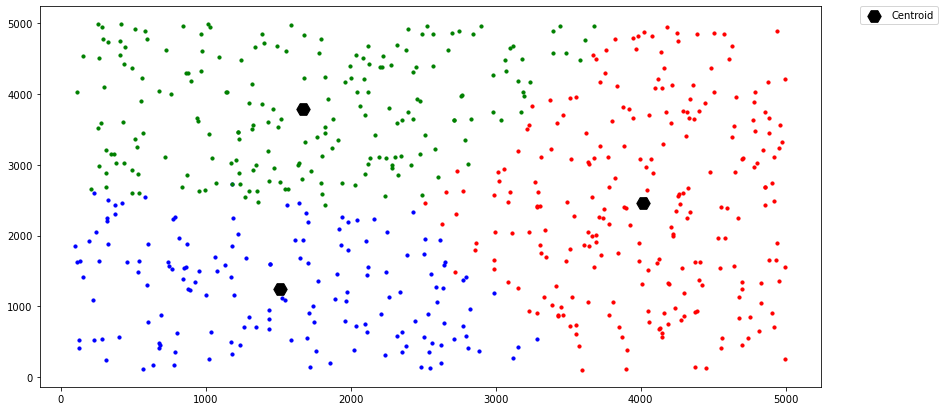

In [16]:
plt.scatter(h1, k1, c='red',s=10)
plt.scatter(m1, v1, c='blue',s=10)
plt.scatter(b1, n1, c='green',s=10)
plt.scatter(final_centroid[0][0],final_centroid[0][1], marker='H',s=180,c='#000000',label='Centroid')
plt.scatter(final_centroid[1][0],final_centroid[1][1], marker='H',s=180,c='#000000')
plt.scatter(final_centroid[2][0],final_centroid[2][1], marker='H',s=180,c='#000000')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.gcf().set_size_inches((14, 7))
plt.show()

In [17]:
len(Cluster_a),len(Cluster_b),len(Cluster_c)

(242, 157, 204)

### Generating a new random data for assigning to existing cluster

In [18]:
list_main = np.array(list)

In [19]:
rpx = np.random.randint(min(list_main[:,0]), max(list_main[:,0]))
rpy = np.random.randint(min(list_main[:,1]), max(list_main[:,1]))

In [20]:
random_new = [rpx,rpy]
random_new

[4251, 3277]

### Euclidean Distance (d1,d2,d3) between new random data and centroid of three clusters

In [21]:
d1=dist(random_new,final_centroid[0])
d2=dist(random_new,final_centroid[1])
d3=dist(random_new,final_centroid[2])
three_distance=[d1,d2,d3]
min_distance=min(three_distance)

print("Euclidean Distance of new random point from the three centroids are: ", round(d1,2), round(d2,2), round(d3,2), "\n")

print("Minimum distance of the new data point from centroids :" ,round(min_distance,2), "\n")

print("The new data point belongs to cluster : ",  three_distance.index(min_distance)+1)

Euclidean Distance of new random point from the three centroids are:  844.63 3412.38 2629.33 

Minimum distance of the new data point from centroids : 844.63 

The new data point belongs to cluster :  1


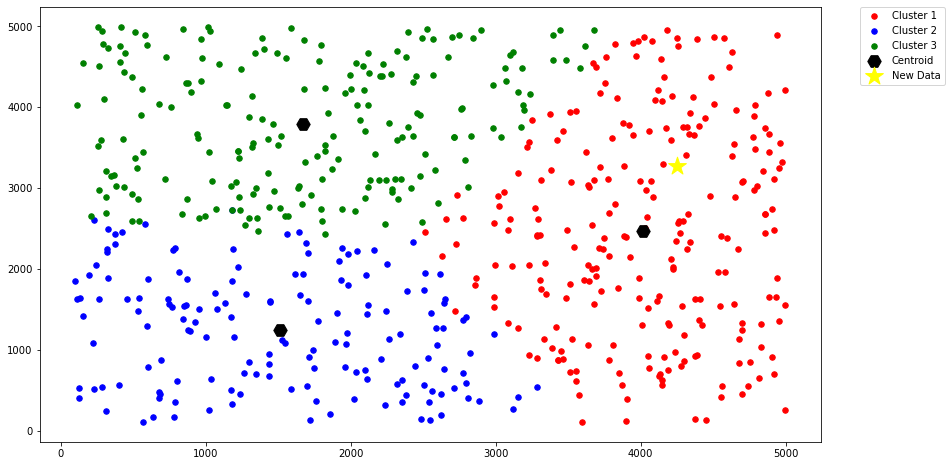

In [22]:
plt.scatter(h1, k1, c='red',s=30,label='Cluster 1')
plt.scatter(m1, v1, c='blue',s=30,label='Cluster 2')
plt.scatter(b1, n1, c='green',s=30,label='Cluster 3')
plt.scatter(final_centroid[0][0],final_centroid[0][1], marker='H',s=180,c='#000000',label='Centroid')
plt.scatter(final_centroid[1][0],final_centroid[1][1], marker='H',s=180,c='#000000')
plt.scatter(final_centroid[2][0],final_centroid[2][1], marker='H',s=180,c='#000000')
plt.scatter(rpx, rpy, marker='*', s=350, c='#FFFF00', label='New Data')
plt.gcf().set_size_inches((14, 8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()